In [57]:
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt

unifiedds = load_dataset('brygotti/MNLP_M3_mcqa_dataset')
df = unifiedds['train'].select_columns(["dataset", "question_type", "relevance_nlp4educ", "relevance_mmlu"]).to_pandas()
len(df)

816351

In [58]:
filtered_on_average = df[(1/2*df['relevance_mmlu'] + 1/2*df['relevance_nlp4educ'])> 0.5]
len(filtered_on_average)

121188

In [59]:
filtered_on_average_42 = df[(1/2*df['relevance_mmlu'] + 1/2*df['relevance_nlp4educ'])> 0.45]
len(filtered_on_average_42)

293269

In [61]:
qcms_only = df[df["question_type"] != "open"]
qcms_only = qcms_only[(1/2*qcms_only['relevance_mmlu'] + 1/2*qcms_only['relevance_nlp4educ'])> 0.3]
len(qcms_only)

419724

In [62]:
all_dataframes = [df, filtered_on_average, filtered_on_average_42, qcms_only]

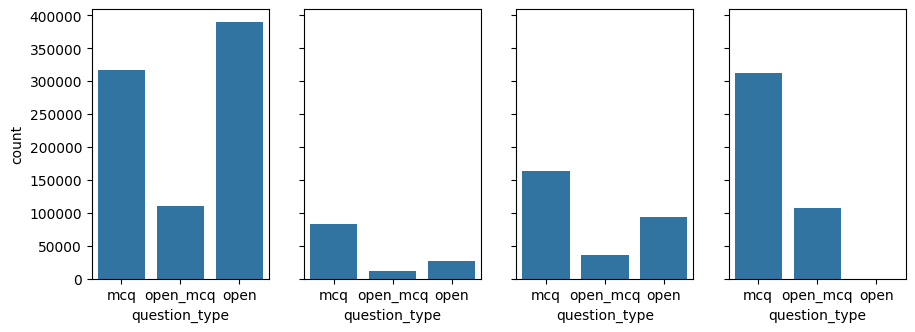

In [63]:
fig, plots = plt.subplots(1, len(all_dataframes), sharex=True, sharey=True)
fig.set_size_inches(10.5, 3.5)

for i, frame in enumerate(all_dataframes):
    sns.countplot(frame, x="question_type", ax=plots[i])

for ax in fig.get_axes():
    ax.label_outer()

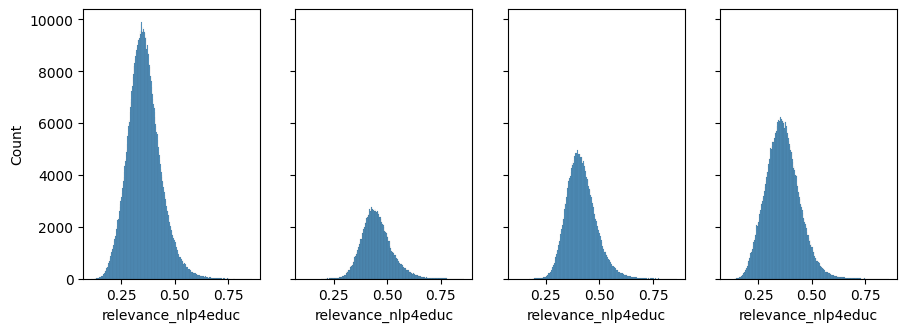

In [64]:
fig, plots = plt.subplots(1, len(all_dataframes), sharex=True, sharey=True)
fig.set_size_inches(10.5, 3.5)

for i, frame in enumerate(all_dataframes):
    sns.histplot(frame, x="relevance_nlp4educ", ax=plots[i])

for ax in fig.get_axes():
    ax.label_outer()

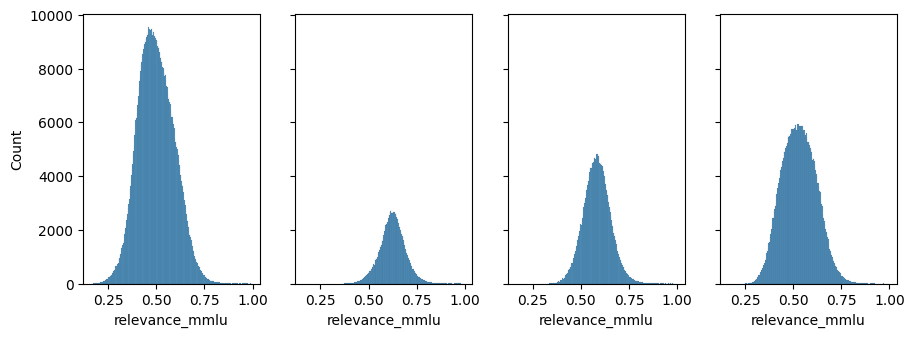

In [65]:
fig, plots = plt.subplots(1, len(all_dataframes), sharex=True, sharey=True)
fig.set_size_inches(10.5, 3.5)

for i, frame in enumerate(all_dataframes):
    sns.histplot(frame, x="relevance_mmlu", ax=plots[i])


for ax in fig.get_axes():
    ax.label_outer()